# 4 Clusters with 2 independent variables, Fare and Age (Just for demonstration purpose)

## Importing data

Libraries and the data will be imported

In [ ]:
import numpy as np
import pandas as pd
data_raw=pd.read_csv('/content/data_for_unsupervisioned.csv',index_col=0)

## Clean the data

The data will be clean preparing for training and modeling

In [ ]:
data_raw

,Age,Pclass,SibSp,Parch,Fare,Sex,Embarked Cherbourg,Embarked Queenstown,Embarked Southampton,Crew,Royal,Married women,Single women,Heir,Men,Survived,Name,Estimed Probability
0,22.000000,3,1,0,7.2500,0,0,0,1,0,0,0,0,0,1,0.0,"Braund, Mr. Owen Harris",7.587837
1,38.000000,1,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",92.873329
2,26.000000,3,0,0,7.9250,1,0,0,1,0,0,0,1,0,0,1.0,"Heikkinen, Miss. Laina",62.733235
3,35.000000,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",91.305065
4,35.000000,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1,0.0,"Allen, Mr. William Henry",8.056557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.588427,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1,0.0,"Spector, Mr. Woolf",9.921523
1305,39.000000,1,0,0,108.9000,1,1,0,0,0,0,0,0,0,0,1.0,"Oliva y Ocana, Dona. Fermina",91.669405
1306,38.500000,3,0,0,7.2500,0,0,0,1,0,0,0,0,0,1,0.0,"Saether, Mr. Simon Sivertsen",7.164314
1307,28.588427,3,0,0,8.0500,0,0,0,1,0,0,0,0,0,1,0.0,"Ware, Mr. Frederick",9.921523


### Selecting the data

Selecting Age and Fare Columns

In [ ]:
X = data_raw.iloc[:,[0,4]].values # for fare and age
#X = data_raw.iloc[:,:-2].values # for all
X_no_scaled = X
print(X)

[[22.          7.25      ]
 [38.         71.2833    ]
 [26.          7.925     ]
 ...
 [38.5         7.25      ]
 [28.58842651  8.05      ]
 [ 6.61944302 22.3583    ]]


##Feature Scaling


.fit() Calculate the mean and standard deviation to use on transform(), and store the values in the StandardScaler() class instance, in this case in the variable sc

.transform() perform standardization by the following formula:
$\mathrm{x}_{standardization}^{}=\frac{x-mean}{standard\text{ }deviation}$

----------------------------

use print(sc.mean_) to see the mean 

use print(sc.var_) to see the variance

use print(np.sqrt(sc.var_)) or print(sc.scale_) to see the standard deviation

-----------------------------

The dummy variables, like embarked, aren't standardized because they are already between 0 and 1

----------------------------

We don't use fit again in X_test because the train is the one that should build the model and scalling

----------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X[:,:-10] = sc.fit_transform(X[:,:-10]) #slicing the dummy variable
X = sc.fit_transform(X)

## Elbow Method to find optimal number of clusters

Elbow method is a method to find the optimal number of clusters.

You must choose the numbers of the clusters based in the X axis in the graph, where the line stops to decline.

In this case we chose 4 clusters.

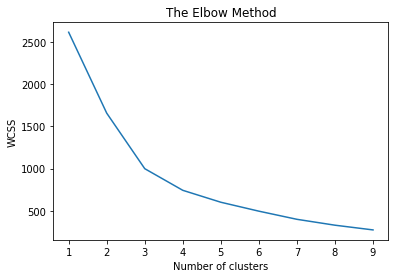

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Build the model

Instantiate the object with the name **kmeans** as a model, for the machine learning

**y_kmeans** is a list that contain the numbers referring to the cluster.

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 3 0 ... 0 0 1]


##Visualization


Plotting a graph to visualize better the clusters in different colors

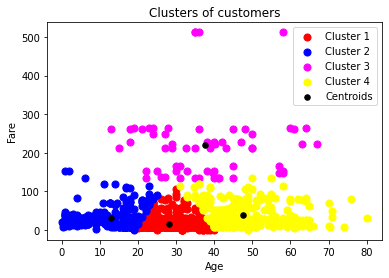

In [ ]:
plt.scatter(X_no_scaled[y_kmeans == 0, 0], X_no_scaled[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_no_scaled[y_kmeans == 1, 0], X_no_scaled[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_no_scaled[y_kmeans == 2, 0], X_no_scaled[y_kmeans == 2, 1], s = 50, c = 'magenta', label = 'Cluster 3')
plt.scatter(X_no_scaled[y_kmeans == 3, 0], X_no_scaled[y_kmeans == 3, 1], s = 50, c = 'yellow', label = 'Cluster 4')

# reverse scalation for the cluster locations
cluster_location = sc.inverse_transform(kmeans.cluster_centers_)
cluster_location_x = []
cluster_location_y = []
for l in cluster_location:
  cluster_location_x.append(l[0])
  cluster_location_y.append(l[1])
plt.scatter(cluster_location_x, cluster_location_y, s = 30, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

##Tests

####Kruskal for Age and Fare

Creating variables for Clusters, Age and Fare

In [ ]:
cluster_1_Age = X_no_scaled[y_kmeans==0,0]
cluster_2_Age = X_no_scaled[y_kmeans==1,0]
cluster_3_Age = X_no_scaled[y_kmeans==2,0]
cluster_4_Age = X_no_scaled[y_kmeans==3,0]
cluster_1_Fare = X_no_scaled[y_kmeans==0,1]
cluster_2_Fare = X_no_scaled[y_kmeans==1,1]
cluster_3_Fare = X_no_scaled[y_kmeans==2,1]
cluster_4_Fare = X_no_scaled[y_kmeans==3,1]


Testing with kruskal all Age variables

In [ ]:
import scipy.stats as stats

In [ ]:
# Age kruskal
t,p= stats.kruskal(cluster_1_Age,cluster_2_Age,cluster_3_Age,cluster_4_Age)

print("Ho = hipotesis null, the clusters do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters do not differ significantly from Age
Ha = alternative hipotesis, the clusters differ significantly from Age
Ho was rejected, they differ significantly, p-value= 5.245043218038982e-215


Testing with kruskal all Fare variables

In [ ]:
# Fare kruskal
t,p= stats.kruskal(cluster_1_Fare,cluster_2_Fare,cluster_3_Fare,cluster_4_Fare)

print("Ho = hipotesis null, the clusters do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters do not differ significantly from Fare
Ha = alternative hipotesis, the clusters differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.859237872989658e-91


####T-test for Age

Testing with T-test for Age in Clusters 1 and 2

In [ ]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_2_Age ) 

print("Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 2.469994348251704e-205


Testing with T-test for Age in Clusters 1 and 3

In [ ]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_3_Age ) 

print("Ho = hipotesis null, the clusters  1 and 3 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters  1 and 3 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters  1 and 3 do not differ significantly from Age
Ha = alternative hipotesis, the clusters  1 and 3 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 2.363599137895279e-31


Testing with T-test for Age in Clusters 1 and 4

In [ ]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_4_Age )

print("Ho = hipotesis null, the clusters  1 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters  1 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters  1 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters  1 and 4 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 3.548095552342577e-244


Testing with T-test for Age in Clusters 2 and 3

In [ ]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_2_Age,cluster_3_Age ) 

print("Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 1.1031365178828716e-61


Testing with T-test for Age in Clusters 2 and 4

In [ ]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_2_Age,cluster_4_Age ) 

print("Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 2.256516641274707e-215


Testing with T-test for Age in Clusters 3 and 4

In [ ]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_3_Age,cluster_4_Age ) 

print("Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 1.0117672030259162e-12


Age means

In [ ]:
print("Average Age from cluster 1: ",cluster_1_Age.mean())
print("Average Age from cluster 2: ",cluster_2_Age.mean())
print("Average Age from cluster 3: ",cluster_3_Age.mean())
print("Average Age from cluster 4: ",cluster_4_Age.mean())

Average Age from cluster 1:  28.235578059603665
Average Age from cluster 2:  12.869666673555084
Average Age from cluster 3:  37.70655400825887
Average Age from cluster 4:  47.686618938890135


####T-test for Fare

Testing with T-test for Fare in Clusters 1 and 2

In [ ]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_2_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.380443205980483e-27


Testing with T-test for Fare in Clusters 1 and 3

In [ ]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_3_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 3 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 3 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 3 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 3 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 9.056262824965108e-258


Testing with T-test for Fare in Clusters 1 and 4

In [ ]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 4.9836450736948884e-61


Testing with T-test for Fare in Clusters 2 and 3

In [ ]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_2_Fare,cluster_3_Fare ) 

print("Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 4.421956827913013e-92


Testing with T-test for Fare in Clusters 2 and 4

In [ ]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_2_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 0.00015957356070582531


Testing with T-test for Fare in Clusters 3 and 4

In [ ]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_3_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.816064050068741e-89


Fare means

In [ ]:
print("Average Fare from cluster 1: ",cluster_1_Fare.mean())
print("Average Fare from cluster 2: ",cluster_2_Fare.mean())
print("Average Fare from cluster 3: ",cluster_3_Fare.mean())
print("Average Fare from cluster 4: ",cluster_4_Fare.mean())

Average Fare from cluster 1:  15.102339655172413
Average Fare from cluster 2:  30.454619850187267
Average Fare from cluster 3:  220.19066129032257
Average Fare from cluster 4:  39.751230560849805


Numbers of items in clusters

In [ ]:
print(len(cluster_1_Age),len(cluster_2_Age),len(cluster_3_Age),len(cluster_4_Age) )

696 267 62 284


##Conclusions

* Age

  For Fare all clusters differ significantly. Average Age:

  * Cluster 1:  28.24

  * Cluster 2:  12.87

  * Cluster 3:  37.71

  * Cluster 4:  47.69

* Fare

  For Fare all clusters differ significantly. Average Fare:

  * Cluster 1:  15.10

  * Cluster 2:  30.45

  * Cluster 3:  220.19

  * Cluster 4:  39.75

* Numbers of items in clusters:

  * Cluster 1:  696

  * Cluster 2:  267

  * Cluster 3:  62

  * Cluster 4:  284

# 2 Clusters with Many independent variables

##Clean the data

The data will be clean preparing for training and modeling

In [ ]:
#data = data_raw.iloc[:,:-2].copy() # with survived
data = data_raw.iloc[:,:-3].copy()
X2 = data.values 
print(data)

            Age  Pclass  SibSp  Parch      Fare  Sex  Embarked Cherbourg  \
0     22.000000       3      1      0    7.2500    0                   0   
1     38.000000       1      1      0   71.2833    1                   1   
2     26.000000       3      0      0    7.9250    1                   0   
3     35.000000       1      1      0   53.1000    1                   0   
4     35.000000       3      0      0    8.0500    0                   0   
...         ...     ...    ...    ...       ...  ...                 ...   
1304  28.588427       3      0      0    8.0500    0                   0   
1305  39.000000       1      0      0  108.9000    1                   1   
1306  38.500000       3      0      0    7.2500    0                   0   
1307  28.588427       3      0      0    8.0500    0                   0   
1308   6.619443       3      1      1   22.3583    0                   1   

      Embarked Queenstown  Embarked Southampton  Crew  Royal  Married women  \
0       

##Feature Scaling


.fit() Calculate the mean and standard deviation to use on transform(), and store the values in the StandardScaler() class instance, in this case in the variable sc

.transform() perform standardization by the following formula:
$\mathrm{x}_{standardization}^{}=\frac{x-mean}{standard\text{ }deviation}$

----------------------------

use print(sc.mean_) to see the mean 

use print(sc.var_) to see the variance

use print(np.sqrt(sc.var_)) or print(sc.scale_) to see the standard deviation

-----------------------------

The dummy variables, like embarked, aren't standardized because they are already between 0 and 1

----------------------------

We don't use fit again in X_test because the train is the one that should build the model and scalling

----------------------------

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X2[:,:-11] = sc.fit_transform(X2[:,:-11]) # with survived
X2[:,:-10] = sc.fit_transform(X2[:,:-10]) #slicing the dummy variable

##Elbow Method to find optimal number of clusters

Elbow method is a method to find the optimal number of clusters.

You must choose the numbers of the clusters based in the X axis in the graph, where the line stops to decline.

In this case we are going to choose 2 clusters, because we need 2 groups to analyse in the tests and the logistic regression.

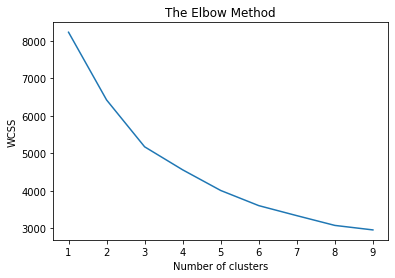

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans2.fit(X2)
  wcss.append(kmeans2.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Modelling

Instantiate the object with the name **kmeans2** as a model, for the machine learning

**y_kmeans2** is a list that contain the numbers referring to the cluster.

In [ ]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans2 = kmeans2.fit_predict(X2)
print(y_kmeans2)

[0 1 0 ... 0 0 0]


## Correlation

Correlation for continuous variables

In [ ]:
corr = data_raw[['Age','Fare','Estimed Probability']].corr() 
print(corr)

                          Age      Fare  Estimed Probability
Age                  1.000000  0.180818            -0.099048
Fare                 0.180818  1.000000             0.363444
Estimed Probability -0.099048  0.363444             1.000000


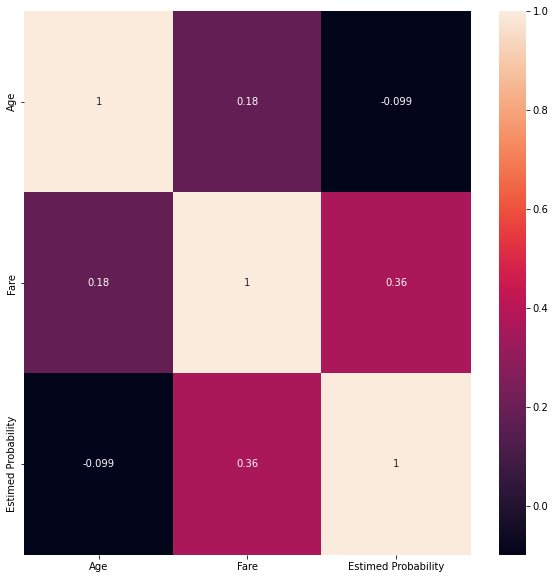

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

##Visualization

Graphs for visualize how the data distribute between the clusters in each column

Function to plot the graphs for Age and Fare

In [ ]:
def hist_norm(column):
  fig , ax = plt.subplots()
  col = data.columns.get_loc(column)

  # getting the data
  series1 = data[y_kmeans2 == 1].iloc[:,col]
  series2 = data[y_kmeans2 == 0].iloc[:,col]

  # plotting
  series1.hist(density=True,edgecolor = 'black', label= 'Cluster 1')
  series2.hist(density=True,edgecolor = 'black',alpha =0.7,label= 'Cluster 2')

  plt.legend()
  ax.set_title(column)
  plt.show()

Fare

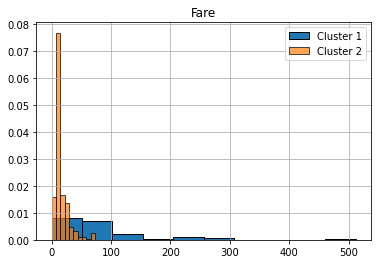

In [ ]:
hist_norm("Fare")

Age

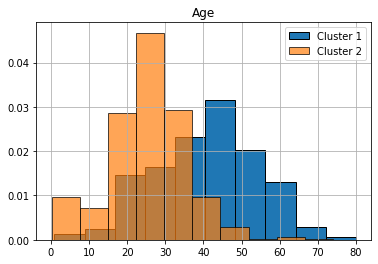

In [ ]:
hist_norm("Age")

Function to plot the graphs for the others columns

In [ ]:
def plot_norm(column):
  fig , ax = plt.subplots()

  # getting the index for the column
  col = data.columns.get_loc(column)

  # We need to ensure that two bar have the same lenght in x

  # it will store and sort all index for the 2 clusters
  series1 = (data[y_kmeans2 == 1].iloc[:,col].value_counts().sort_index())
  series2 = (data[y_kmeans2 == 0].iloc[:,col].value_counts().sort_index())

  # if the index is not in cluster 1 it will create on in cluster 2
  for i in series1.index:
    if i not in series2.index:
      series2.loc[i] = 0 

  # if the index is not in cluster 2 it will create on in cluster 1
  for i in series2.index:
    if i not in series1.index:
      series1.loc[i] = 0 

  # To make the bar standart, the sum of the data will be 1
  series1_norm = series1 / series1.sum()
  series2_norm = series2 / series2.sum()

  # plotting
  x = np.arange(len(series1_norm))
  width = 0.35 
  rects1 = ax.bar(x - width/2, series1_norm, width, label='Cluster 1')
  rects2 = ax.bar(x + width/2, series2_norm, width, label='Cluster 2')

  plt.xlim(-1,len(series1_norm))
  ax.set_title(column)
  plt.legend()
  plt.show()


Pclass

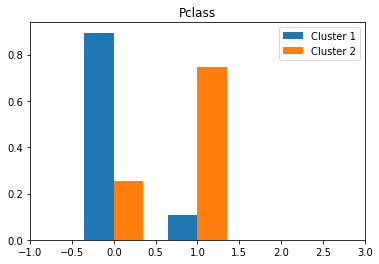

In [ ]:
plot_norm("Pclass")

Sex

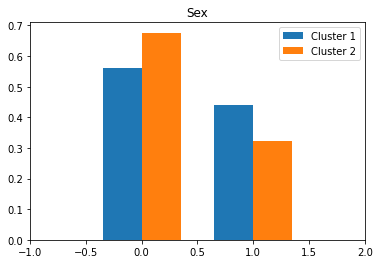

In [ ]:
plot_norm("Sex")

SibSp

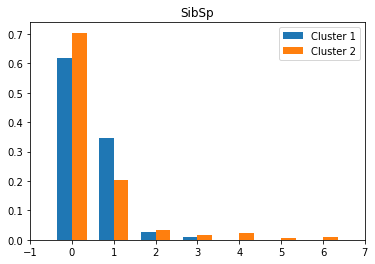

In [ ]:
plot_norm("SibSp")

Parch

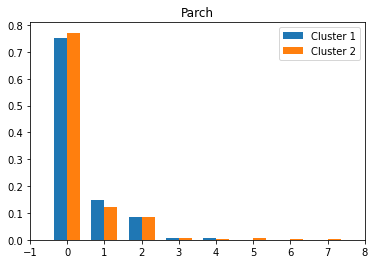

In [ ]:
plot_norm("Parch")

Embarked Cherbourg

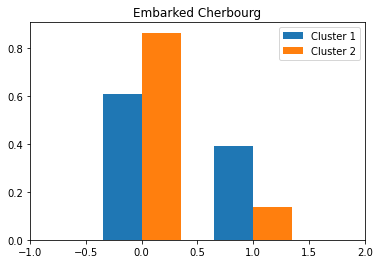

In [ ]:
plot_norm("Embarked Cherbourg")

Embarked Queenstown

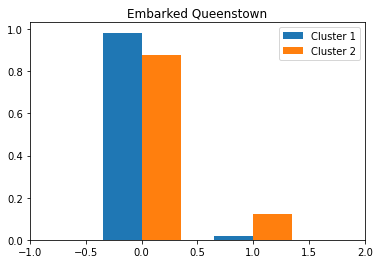

In [ ]:
plot_norm("Embarked Queenstown")

Embarked Southampton

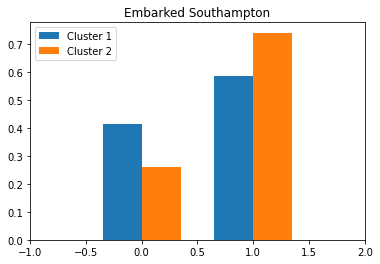

In [ ]:
plot_norm("Embarked Southampton")

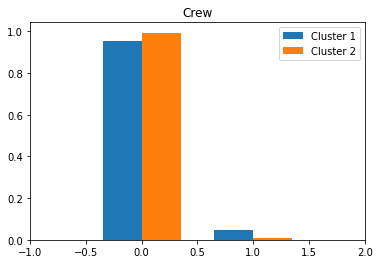

In [ ]:
plot_norm("Crew")

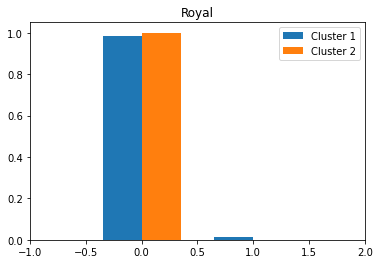

In [ ]:
plot_norm("Royal")

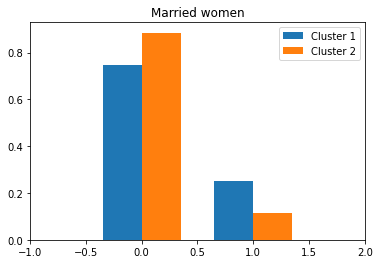

In [ ]:
plot_norm("Married women")

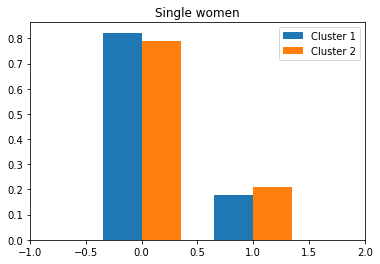

In [ ]:
plot_norm("Single women")

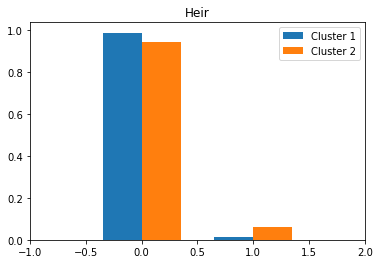

In [ ]:
plot_norm("Heir")

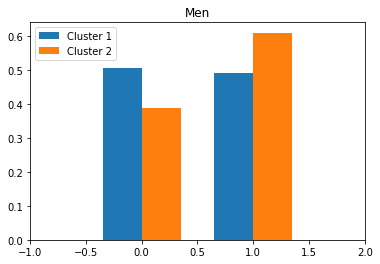

In [ ]:
plot_norm("Men")

In [ ]:
#plot_norm("Survived")

## Comparing

**Confusion Matrix:**

True means the predict was right

False means the predict was wrong

Positive means the value predict is 1

Negative means the value predict is 0

With those terms we can make a confusion matrix:

\begin{bmatrix}
True\text{ }Negative & False\text{ }Negative \\
False\text{ }Positive & True\text{ }Positive
\end{bmatrix}

**Accuracy** is the rate between the perdictons right and wrong

In this test the Confusion Matrix will be used this way:

* True Positive: Cluster 1 and Column value 1

* True Negative: Cluster 0 and Column value 0

* False Positive: Cluster 1 and Column value 0 

* False Negative: Cluster 0 and Column value 1

Example:

How much is the relationship between Clusters and Survived?

The test gave percentage of correlation: 82.58%

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def matrix_correlation(tag):
  cm = confusion_matrix(data_raw.iloc[:,data_raw.columns.get_loc(tag)],  y_kmeans2)
  print('Confusion matrix: ')
  print(cm)

  print(f'True Positive:{cm[1][1]}  True Negative:{cm[0][0]}  False Positive:{cm[0][1]}  False Negative:{cm[1][0]}')

  acc = accuracy_score(data_raw.iloc[:,data_raw.columns.get_loc(tag)], y_kmeans2)

  if acc>0.5:
    print('The 2° Cluster(y_kmeans2[1]) represents the {} with value 1. Percentage of correlation: {:.2%}'.format(tag,acc))
  else:
    print('The 1° Cluster(y_kmeans2[0]) represents the {} with value 1. Percentage of correlation: {:.2%}'.format(tag,1-acc))

Survived

In [ ]:
matrix_correlation('Survived')

Confusion matrix: 
[[652 151]
 [296 210]]
True Positive:210  True Negative:652  False Positive:151  False Negative:296
The 2° Cluster(y_kmeans2[1]) represents the Survived with value 1. Percentage of correlation: 65.85%


Sex

In [ ]:
matrix_correlation('Sex')

Confusion matrix: 
[[641 202]
 [307 159]]
True Positive:159  True Negative:641  False Positive:202  False Negative:307
The 2° Cluster(y_kmeans2[1]) represents the Sex with value 1. Percentage of correlation: 61.12%


Embarked Cherbourg

In [ ]:
matrix_correlation('Embarked Cherbourg')

Confusion matrix: 
[[819 220]
 [129 141]]
True Positive:141  True Negative:819  False Positive:220  False Negative:129
The 2° Cluster(y_kmeans2[1]) represents the Embarked Cherbourg with value 1. Percentage of correlation: 73.34%


Embarked Queenstown

In [ ]:
matrix_correlation('Embarked Queenstown')

Confusion matrix: 
[[831 355]
 [117   6]]
True Positive:6  True Negative:831  False Positive:355  False Negative:117
The 2° Cluster(y_kmeans2[1]) represents the Embarked Queenstown with value 1. Percentage of correlation: 63.94%


Embarked Southampton

In [ ]:
matrix_correlation('Embarked Southampton')

Confusion matrix: 
[[246 149]
 [702 212]]
True Positive:212  True Negative:246  False Positive:149  False Negative:702
The 1° Cluster(y_kmeans2[0]) represents the Embarked Southampton with value 1. Percentage of correlation: 65.01%


Crew

In [ ]:
matrix_correlation('Crew')

Confusion matrix: 
[[942 344]
 [  6  17]]
True Positive:17  True Negative:942  False Positive:344  False Negative:6
The 2° Cluster(y_kmeans2[1]) represents the Crew with value 1. Percentage of correlation: 73.26%


Royal

In [ ]:
matrix_correlation('Royal')

Confusion matrix: 
[[948 356]
 [  0   5]]
True Positive:5  True Negative:948  False Positive:356  False Negative:0
The 2° Cluster(y_kmeans2[1]) represents the Royal with value 1. Percentage of correlation: 72.80%


Married women

In [ ]:
matrix_correlation('Married women')

Confusion matrix: 
[[839 270]
 [109  91]]
True Positive:91  True Negative:839  False Positive:270  False Negative:109
The 2° Cluster(y_kmeans2[1]) represents the Married women with value 1. Percentage of correlation: 71.05%


Single women

In [ ]:
matrix_correlation('Single women')

Confusion matrix: 
[[750 297]
 [198  64]]
True Positive:64  True Negative:750  False Positive:297  False Negative:198
The 2° Cluster(y_kmeans2[1]) represents the Single women with value 1. Percentage of correlation: 62.18%


Heir

In [ ]:
matrix_correlation('Heir')

Confusion matrix: 
[[892 356]
 [ 56   5]]
True Positive:5  True Negative:892  False Positive:356  False Negative:56
The 2° Cluster(y_kmeans2[1]) represents the Heir with value 1. Percentage of correlation: 68.53%


Men

In [ ]:
matrix_correlation('Men')

Confusion matrix: 
[[369 183]
 [579 178]]
True Positive:178  True Negative:369  False Positive:183  False Negative:579
The 1° Cluster(y_kmeans2[0]) represents the Men with value 1. Percentage of correlation: 58.21%


##Conclusions

Without putting in calculations the survived, it was calculated the correlation between variables and the two clusters

* The following items represents the variable correlation with 1° Cluster:

  * Embarked Southampton: 65.01%

  *  Men: 58.21%

* The following items represents the variable correlation with 2° Cluster:
  
  * Survived: 65.85%

  * Sex: 61.12%

  * Embarked Cherbourg: 73.34%

  * Embarked Queenstown: 63.94%

  * Crew: 73.26%
  
  * Royal: 72.80%
  
  * Married women: 71.05%

  * Single women: 62.18%

  * Heir: 68.53%
